In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
path = 'https://github.com/alvinoc/movies-analysis/blob/main/analise%20movies/core_movie.csv?raw=true'
movies = pd.read_csv(path,sep=',')
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0012494,Der müde Tod,Der müde Tod,1921,2017-06-09,"Drama, Fantasy, Thriller",97,Germany,German,Fritz Lang,"Fritz Lang, Thea von Harbou",Decla-Bioscop AG,"Bernhard Goetzke, Lil Dagover, Walter Janssen,...","When a woman's fiancé disappears, Death gives ...",7.7,4695,NaN,$ 12156,$ 12156,NaN,33.0,41.0
1,tt0013579,Schatten - Eine nächtliche Halluzination,Schatten - Eine nächtliche Halluzination,1923,2016-11-29,"Drama, Fantasy, Horror",90,Germany,German,Arthur Robison,"Arthur Robison, Rudolf Schneider",PAN Film,"Alexander Granach, Max Gülstorff, Lilli Herder...",A wealthy man invites the local wealthy bachel...,6.9,787,NaN,NaN,NaN,NaN,15.0,16.0
2,tt0018054,The King of Kings,The King of Kings,1927,2004,"Biography, Drama, History",155,USA,English,Cecil B. DeMille,Jeanie Macpherson,DeMille Pictures Corporation,"H.B. Warner, Dorothy Cumming, Ernest Torrence,...",Jesus Christ faces religious and political opp...,7.3,1771,$ 2500000,NaN,NaN,NaN,46.0,23.0
3,tt0020286,Prapancha Pash,Prapancha Pash,1929,2007-09-04,"Adventure, Drama, Romance",74,"UK, India, Germany",English,Franz Osten,"Niranjan Pal, W.A. Burton",British Instructional Films (BIF),"Seeta Devi, Himanshu Rai, Charu Roy, Modhu Bos...",Two neighboring Indian kingdoms are ruled by c...,6.5,640,NaN,NaN,$ 2306,NaN,8.0,14.0
4,tt0021331,Le sang d'un poète,Le sang d'un poète,1930,2010-05-20,Fantasy,55,France,French,Jean Cocteau,Jean Cocteau,Vicomte de Noailles,"Enrique Rivero, Elizabeth Lee Miller, Pauline ...",A young artist draws a face at a canvas on his...,7.4,5310,NaN,NaN,NaN,NaN,31.0,44.0


**Analisando a duração dos filmes**

In [ ]:
movies['duration'].value_counts()

90     2964
100    1712
95     1665
93     1260
85     1201
       ... 
262       1
230       1
485       1
345       1
319       1
Name: duration, Length: 203, dtype: int64

* Com isso conseguimos descobrir que a maioria dos filmes têm 90m(1h30m) de duração

In [ ]:
movies['duration'].value_counts().sort_index()

41       1
42       1
45      19
46      11
47      12
        ..
485      1
540      3
729      1
808      1
3360     1
Name: duration, Length: 203, dtype: int64

In [ ]:
Ao chamar o método sort_index(), descobrimos algums extremos, como:
* O filme de menor duração tem 41m
* O filme de maior duração tem 3360m

**Analisando os extremos**

In [ ]:
movies.query("duration == 41")

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
14993,tt10682000,Sound & Fury,Sound & Fury,2019,2019-09-27,Animation,41,USA,NaN,"Michael Arias, Jumpei Mizusaki","Jumpei Mizusaki, Sturgill Simpson",NaN,Chiyuki Kanazawa,A post-apocalyptic anime music film featuring ...,6.6,795,NaN,NaN,NaN,NaN,27.0,7.0


* o metodo dataframe.query() funciona como uma consulta sql, onde dentro dos () podemos inserir consultas junto com operadores logicos

In [ ]:
movies.query("duration == 3360")

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
24679,tt2008009,The Clock,The Clock,2010,2010-10-15,Drama,3360,UK,English,Christian Marclay,Christian Marclay,NaN,"Rosanna Arquette, Bette Davis, Leonardo DiCapr...",Scenes from various films and TV programs that...,8.8,230,NaN,NaN,NaN,NaN,4.0,NaN


* Obs:
  * achei estranho um filme com duração de 3360m (56h) e fui pesquisar. Esse filme possui 1440m de duração (24h), oq mostra que esse df possui algumas divergências

In [ ]:
movies["avg_vote"].value_counts().sort_index()

1.0     17
1.1     14
1.2     20
1.3     13
1.4     26
        ..
9.5      3
9.6      2
9.7      1
9.8      1
10.0     2
Name: avg_vote, Length: 90, dtype: int64

In [ ]:
#Filmes com média 10
movies.query("avg_vote == 10")

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
15313,tt10914342,Kirket,Kirket,2019,2019-10-18,"Drama, Sport",132,India,Hindi,Yogendra Singh,Vishal Vijay Kumar,A square productions,"Kirti Azad, Sonam Chhabra, Sonu Jha, Jai Kumar...","The story of how one man, single-handedly chan...",10.0,587,NaN,NaN,NaN,NaN,11.0,NaN
40971,tt6735740,Love in Kilnerry,Love in Kilnerry,2019,2019-06-23,Comedy,100,USA,English,"Daniel Keith, Snorri Sturluson",Daniel Keith,Archway Pictures,"Daniel Keith, Kathy Searle, Tony Triano, James...",The elderly resident of a small remote town pa...,10.0,2360,$ 1200000,NaN,NaN,NaN,6.0,10.0


In [ ]:
#Filmes com media 1
movies.query("avg_vote == 1")

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
22560,tt1753912,Holnap történt - A nagy bulvárfilm,Holnap történt - A nagy bulvárfilm,2009,2009-02-04,"Comedy, Mystery",82,Hungary,Hungarian,Tamás Gerencsér,NaN,NaN,"Anett Fehér, Tamás Gerencsér, József Ihos, Kat...","A singing star get murdered, and the worlds mo...",1.0,790,HUF 50000000,NaN,NaN,NaN,1.0,NaN
25385,tt2100624,Seikai gûdo mooningu!!,Seikai gûdo mooningu!!,2010,2010,Comedy,81,Japan,Japanese,Satoru Hirohara,Satoru Hirohara,NaN,"Miho Arai, Mitsunori Izumi, Shotaro Kaneyama, ...",NaN,1.0,376,NaN,NaN,NaN,NaN,NaN,2.0
30876,tt3185040,Ryûsei,Ryûsei,2013,2013-11-16,"Drama, Family",78,Japan,Japanese,Kenji Tani,"Midori Satô, Midori Satô",Rex Enterprises,"Kaname Endô, Yûki Satô, Ryôma Baba, Haruka Koh...",What did the boys wish for that day? Twelve ye...,1.0,276,NaN,NaN,NaN,NaN,NaN,NaN
31007,tt3216288,One Night: Choice of Evil,One Night: Choice of Evil,2010,2010-10-15,"Comedy, Drama, Romance",79,Taiwan,"Min Nan, Mandarin",Tommy Yu,Tommy Yu,Leader Asia Pacific Creativity Center,"Yukihiko Kageyama, Toyoharu Kitamura, Linda Li...",An unassuming valet looking for his lucky brea...,1.0,396,NaN,NaN,NaN,NaN,NaN,NaN
31166,tt3262718,"Bai bai, marâno","Bai bai, marâno",2013,2013-07-08,Drama,114,Japan,Japanese,Yunsu Kim,Yunsu Kim,Tokyo University of the Arts,"Yumiko Hara, Sujin Lee, Gyô Miyamoto, Shû Naka...",NaN,1.0,191,NaN,NaN,NaN,NaN,NaN,NaN
36248,tt4837074,Ritoru Kyouta no bouken,Ritoru Kyouta no bouken,2017,2017-04-01,Adventure,82,Japan,Japanese,Satsuki Okawa,Satsuki Okawa,Little Neon Films,"Tao Tsuchiya, Misa Shimizu, Hidekazu Mashima, ...",NaN,1.0,143,NaN,NaN,NaN,NaN,NaN,NaN
36259,tt4839424,Qi che ren zong dong yuan,Qi che ren zong dong yuan,2015,2015-07-03,"Animation, Adventure, Family",85,China,Mandarin,Jianrong Zhuo,NaN,Xiamen Lanhuoyan Film Animation Co.,"Christopher Petrosian, Dawei Hu, Xinxuan Liu, ...",NaN,1.0,116,NaN,NaN,NaN,NaN,2.0,NaN
36548,tt4937514,A no dentou,A no dentou,2014,2014-03-01,Drama,53,Japan,Japanese,Keiko Tsuruoka,Keiko Tsuruoka,Tokyo University of the Arts,"Suzuna Kinosuta, Mariko Kobayashi, Akaji Maro,...",NaN,1.0,341,NaN,NaN,NaN,NaN,NaN,NaN
36611,tt4954968,Suguru hi no yamaneko,Suguru hi no yamaneko,2015,2015-09-19,Drama,92,Japan,Japanese,Keiko Tsuruoka,Keiko Tsuruoka,Amuse,"Tsuruko Hishinuma, Shôichi Ikeda, Yuki Izumisa...",NaN,1.0,364,NaN,NaN,NaN,NaN,NaN,NaN
36715,tt4986830,Pure Hearts: Into Chinese Showbiz,Pure Hearts: Into Chinese Showbiz,2015,2017-09-20,"Comedy, Drama",96,China,Chinese,Zhifei Bi,Zhifei Bi,NaN,NaN,Pure Hearts: Into Chinese Showbiz is the maide...,1.0,476,NaN,NaN,$ 368543,NaN,16.0,NaN


In [ ]:
movies.query("avg_vote == 1")["country"].value_counts()

Japan       11
China        2
Hungary      1
Turkey       1
Taiwan       1
Malaysia     1
Name: country, dtype: int64

Um fato interessante é que dos 17 piores filmes avaliados (avg_vote ==1)

 o Japão é o pais com mais filmes. 11 no total(64%).

In [ ]:
movies.query("avg_vote == 1")["country"].value_counts(normalize=True)

Japan       0.647059
China       0.117647
Hungary     0.058824
Turkey      0.058824
Taiwan      0.058824
Malaysia    0.058824
Name: country, dtype: float64

In [ ]:
movies['year'].value_counts()

2017    3106
2016    3033
2015    2903
2018    2880
2014    2851
        ... 
1977       1
1946       1
1978       1
1949       1
1952       1
Name: year, Length: 68, dtype: int64

**Visualizando os dados acima com grafico de barras**

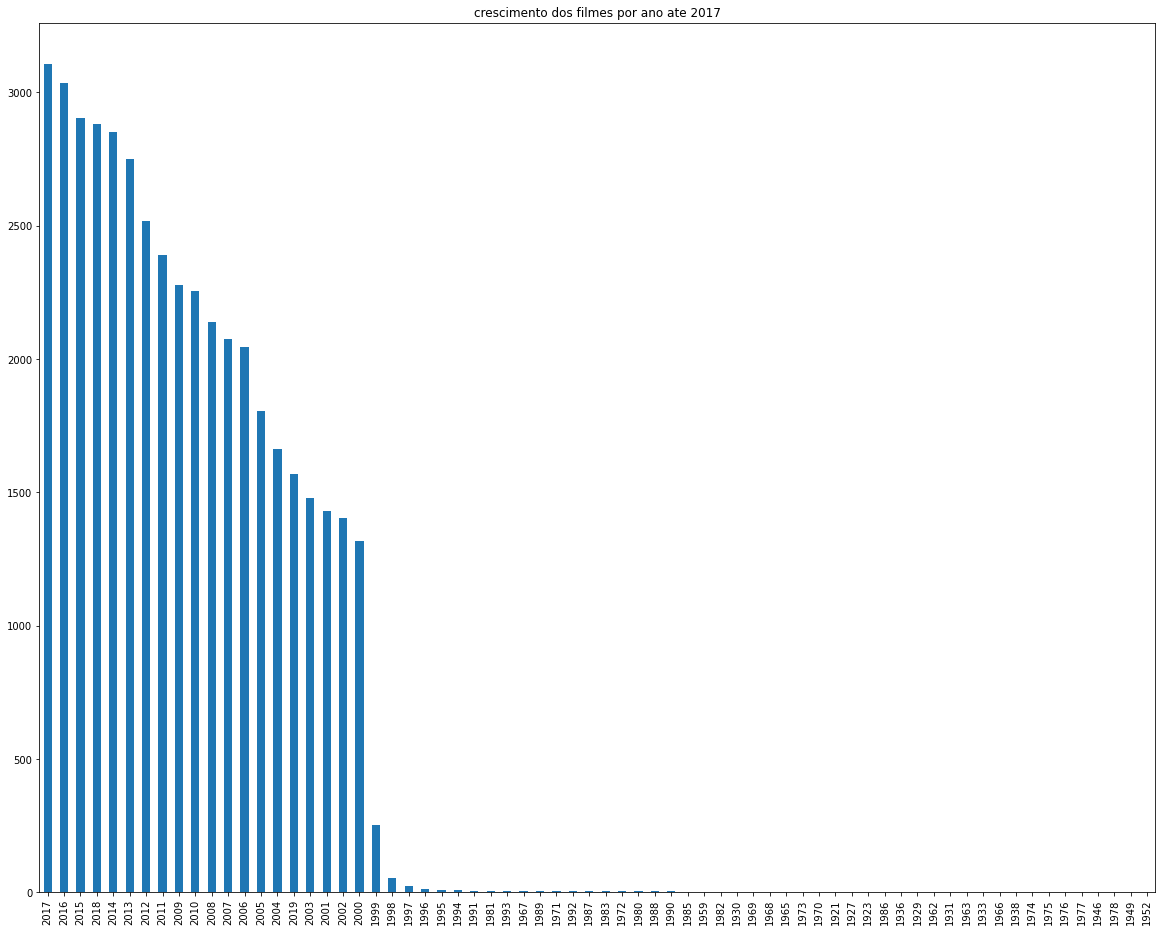

In [ ]:
plt.title("crescimento dos filmes por ano ate 2019")
movies['year'].value_counts().plot.bar(figsize=(20,16))

* No gráfico de barras fica mais facil de visualizar que a partir da decada de 2000 o numero de filmes produzidos aumentou exponencialmente

In [ ]:
import seaborn as sns

**Função para plotar o grafico de bloxplot**

* Recebe uma coluna do df no eixo x (em formato de string)
* Recebe uma coluna do df no eixo y (em formato de string)
* o dataframe
* e o titulo (em formato de string)

In [ ]:
def movie_boxplot(eixo_x, eixo_y, data_frame, titulo):
  ordenacao = data_frame[eixo_x].unique()
  ordenacao.sort()
  plt.figure(figsize=(50,12))
  sns.boxplot(x= eixo_x, y = eixo_y, data= data_frame, order = ordenacao )
  plt.title(titulo)


**Analise dos gêneros do dataframe**

In [ ]:
movies['genre'].value_counts().sort_index()

Action                          449
Action, Adventure                59
Action, Adventure, Biography     16
Action, Adventure, Comedy       299
Action, Adventure, Crime         75
                               ... 
War                              19
War, Action, Adventure            1
War, Drama                        2
War, Drama, Action                1
Western                          52
Name: genre, Length: 858, dtype: int64

* Como podemos ver, existem 858 generos, pois o df junta varios generos em um só filme, o que se torna inviável analisar visualmente

In [ ]:
movies['genre'].value_counts()

Drama                          7208
Comedy                         3770
Comedy, Drama                  2488
Drama, Romance                 1720
Comedy, Romance                1410
                               ... 
Adventure, Crime, Mystery         1
Drama, Comedy, Action             1
Adventure, Thriller, Action       1
Animation, Comedy, Mystery        1
Animation, Horror, Thriller       1
Name: genre, Length: 858, dtype: int64

* Com isso, vamos analisar os principais generos, juntamente com os 5 que mais aparece no df (Drama, Comedy "Comedy, Drama", "Drama,Romance" e "Comedy Romance")

* Vamos criar uma lista com os principais generos existentes, juntamente coms os 5 que mais aparecem no df.
  * Pesquisar no df os filmes que se enquadram nessa lista
  * criar um novo df com tais filmes para que a visualização fique mais clara 


In [ ]:
principais_generos = ["Action", "Drama", "Comedy", "Romance", "Adventure", "Thriller", "Horror", "War", "Western", "Comedy, Drama", "Drama, Romance", "Comedy, Romance"]

In [ ]:
movies_principais_generos = movies[movies['genre'].isin(principais_generos)]
movies_principais_generos.shape

(19729, 22)

In [ ]:
movies_principais_generos['genre'].value_counts()

Drama              7208
Comedy             3770
Comedy, Drama      2488
Drama, Romance     1720
Comedy, Romance    1410
Horror             1374
Thriller            847
Action              449
Romance             336
Adventure            56
Western              52
War                  19
Name: genre, dtype: int64

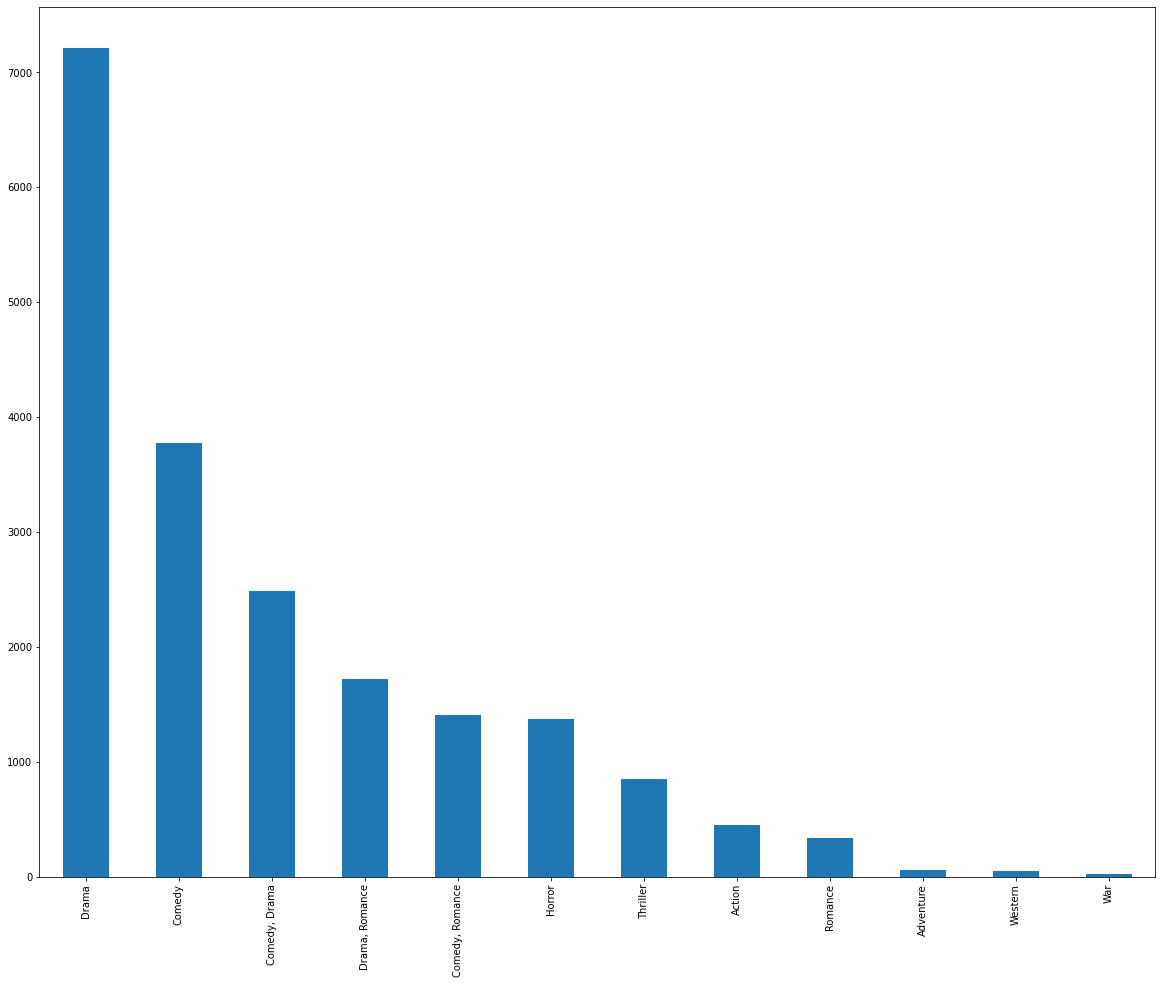

In [ ]:
movies_principais_generos['genre'].value_counts().plot.bar(figsize=(20,16))

**Explicando o boxplot**


* O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa.
* Ele é formado por:
  * outlier:
    * Valores que  são atípicos, discrepantes, extremos
    * Estão acima e/ou abaixo das caudas(max e min)

  * Max e min:
    * Valores que se distanciam da mediana em ate 1,5% (98,5% está dentro da box)
    * Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)
    *  Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)

  * Quartil:
    * É dividido em 3 partes:
      * Primeiro quartil(Percentil 25):
        * É calculado pela seguinte formula: 25 * Tamanho da Amostra / 100
        * Significa que pelo menos 25% dos dados estão entre o primeiro quartil e o segundo quartil
      * Segundo quartil (Percentil 50):
        * É também a mediana 
        * O segundo quartil equivale ao percentil 50, valor em que pelo menos 50% da amostra está acima dele e pelo menos 50% está abaixo.
      * Terceiro quartil (percentil 75):
        * Usa a mesma formula do primeiro quartil, mudando apenas o primeiro numero.
    * O box é analisado da seguinte maneira:
      * Quanto maior o tamanho do box, maior a dispersão dos dados observados
      * Um conjunto de dados que tem uma distribuição simétrica, terá a linha da mediana no centro do retângulo. Quando a linha da mediana está próxima ao primeiro quartil, os dados são assimétricos positivos e quando a posição da linha da mediana é próxima ao terceiro quartil, os dados são assimétricos negativos. Vale ressaltar que a mediana é a medida de tendência central mais indicada quando os dados possuem distribuição assimétrica, uma vez que a média aritmética é influenciada pelos valores extremos.

Fonte: https://operdata.com.br/blog/como-interpretar-um-boxplot/


**Analisando a media de votos por genero**

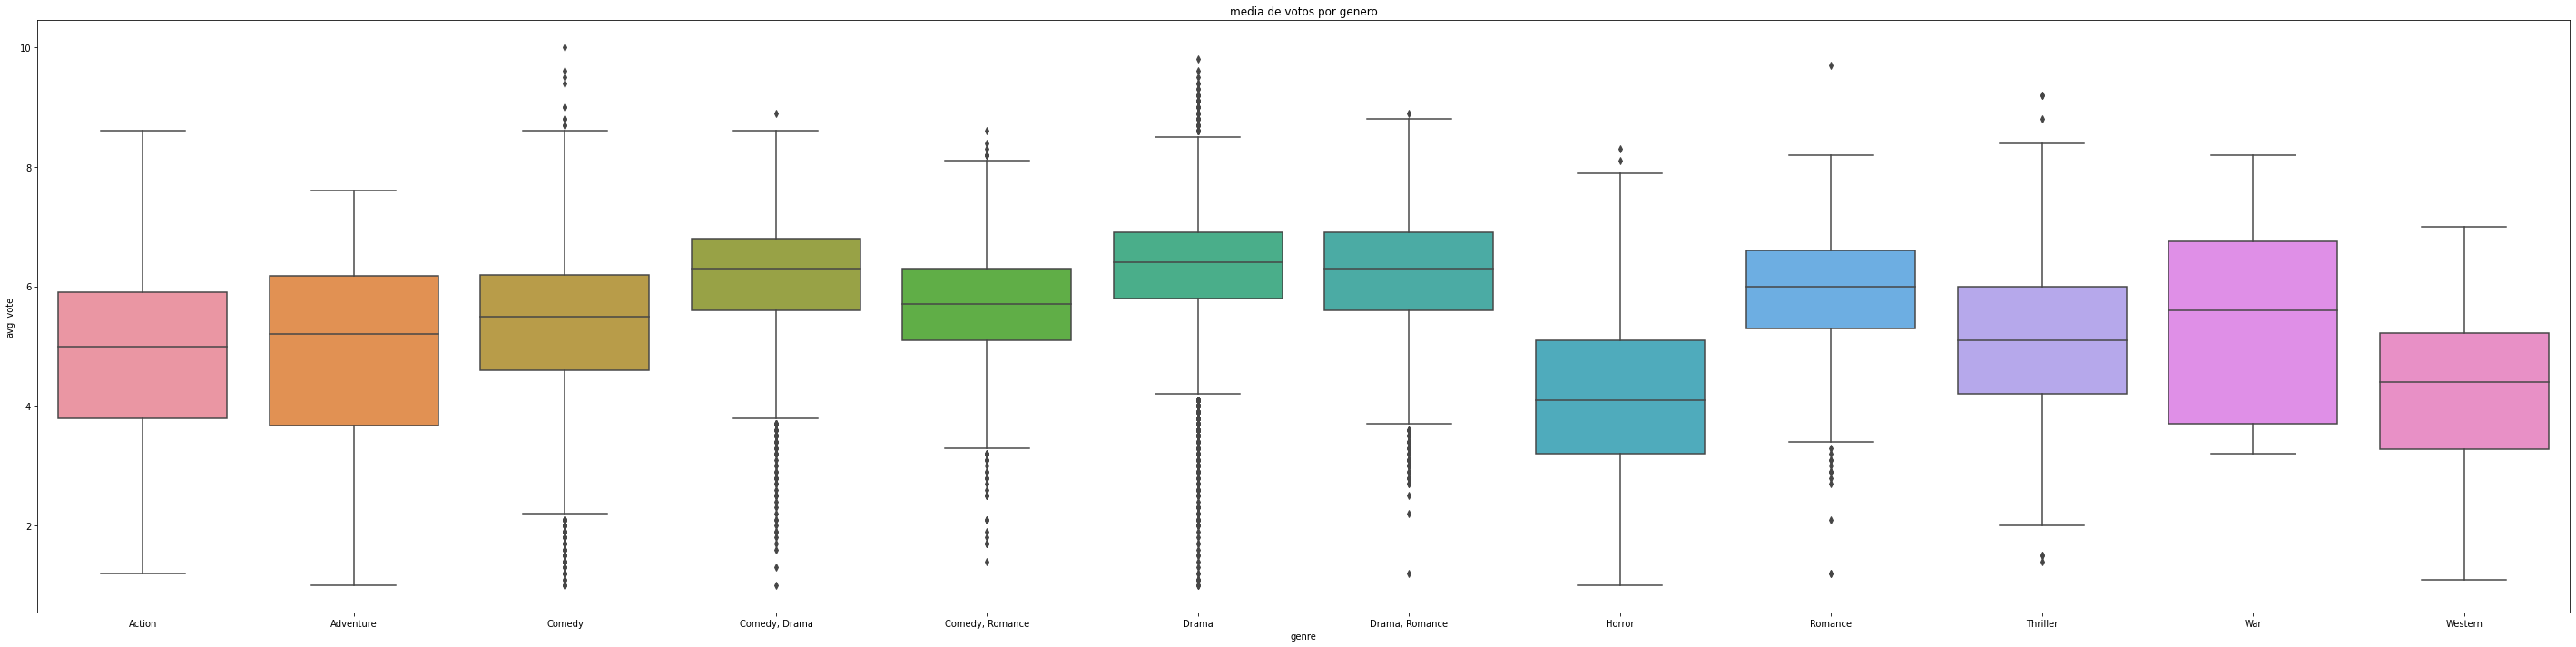

In [ ]:
movie_boxplot("genre","avg_vote",movies_principais_generos, "media de votos por genero")

A partir desse grafico notamos que:
* O genero drama é o que possui maior nota média e uma menor dispersão nas notas, apesar de que sua mediana encontra-se mais próximo do terceiro quartil.
* Comédia é oq possui a maior nota, mesmo sendo um outlier
* Horror apresenta as menores notas